# Tarea 2 - Regresion Polinomial & Feature engineering

### Parte 1 - Modelo exponencial de covid-19 usando feature-eng

Usando el ejemplo de covid-19 en el notebook de feature-eng (https://colab.research.google.com/drive/1sJV2HG7tQgCGKES3-dIclzHQJ9qAWB3b?usp=sharing) crear un modelo de covid-19 para Guatemala.

* Convertir la fecha a un entero "número de día", por ejemplo si se usan datos desde el 22 de abril, este es el día 0, el 23 es el día 1.
* Aplicar regresión lineal sobre la variable "Confirmed" transformada.
* Una vez entrenado el modelo usarlo para aproximar la cantidad de casos confirmados para el 6 de Junio. Se debe reportar la cantidad de casos, no la cantidad transformada obtenida.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import datetime


In [2]:
#Cargando datos
dataCovid = pd.read_csv('covid_19_clean_complete.csv')
dataCovid.head()
dataCovid.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
dtype: object

In [3]:
#Convirtiendo a fecha la columna del dataset "Date"
dataCovid["Date"] = pd.to_datetime(dataCovid["Date"],infer_datetime_format = True)
dataCovid.head()
dataCovid.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
dtype: object

In [4]:
#Extrayendo los datos de Guatemala
GT_CovidConfirmed = dataCovid[(dataCovid["Country/Region"] == 'Guatemala') & (dataCovid["Confirmed"] > 0)].copy()

In [5]:
#Resumen descriptivo de fechas
GT_CovidConfirmed.loc[:,"Date"].describe()

count                      67
unique                     67
top       2020-04-13 00:00:00
freq                        1
first     2020-03-14 00:00:00
last      2020-05-19 00:00:00
Name: Date, dtype: object

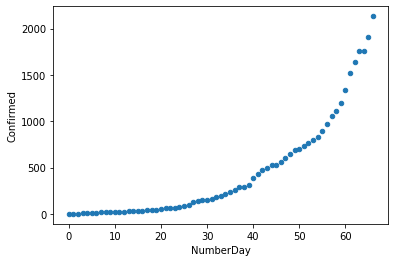

In [6]:
#Agregando columna para número de día (desde fecha inicial 2020-03-14)
GT_CovidConfirmed["NumberDay"] = (GT_CovidConfirmed.loc[:,"Date"] - GT_CovidConfirmed.loc[:,"Date"].min()).dt.days

GT_CovidConfirmed.plot.scatter(x = "NumberDay",y="Confirmed")

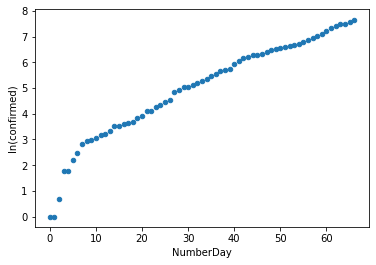

In [7]:
#Transformando la variable confirmed utilizando logaritmos
GT_CovidConfirmed["ln(confirmed)"] = np.log(GT_CovidConfirmed["Confirmed"])
GT_CovidConfirmed.plot.scatter(x = "NumberDay",y="ln(confirmed)")


In [8]:
#Verificando columnas agregadas al dataSet
GT_CovidConfirmed.head(20)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,NumberDay,ln(confirmed)
13903,NaN,Guatemala,15.7835,-90.2308,2020-03-14,1,0,0,0,0.000000
14168,NaN,Guatemala,15.7835,-90.2308,2020-03-15,1,0,0,1,0.000000
14433,NaN,Guatemala,15.7835,-90.2308,2020-03-16,2,1,0,2,0.693147
14698,NaN,Guatemala,15.7835,-90.2308,2020-03-17,6,1,0,3,1.791759
14963,NaN,Guatemala,15.7835,-90.2308,2020-03-18,6,1,0,4,1.791759
15228,NaN,Guatemala,15.7835,-90.2308,2020-03-19,9,1,0,5,2.197225
15493,NaN,Guatemala,15.7835,-90.2308,2020-03-20,12,1,0,6,2.484907
15758,NaN,Guatemala,15.7835,-90.2308,2020-03-21,17,1,0,7,2.833213
16023,NaN,Guatemala,15.7835,-90.2308,2020-03-22,19,1,0,8,2.944439
16288,NaN,Guatemala,15.7835,-90.2308,2020-03-23,20,1,0,9,2.995732


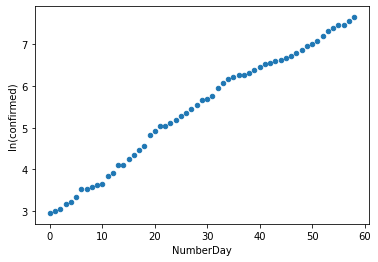

In [9]:
#Eliminando las primeras observaciones (ruido) y tomando los tatos a partir del 2020-03-22
GT_CovidConfirmed_from22 = GT_CovidConfirmed[GT_CovidConfirmed.Date >= '2020-03-22'].copy()
dateMin=GT_CovidConfirmed_from22.loc[:,"Date"].min()
GT_CovidConfirmed_from22["NumberDay"] = (GT_CovidConfirmed_from22.loc[:,"Date"] - dateMin).dt.days
GT_CovidConfirmed_from22.plot.scatter(x = "NumberDay",y="ln(confirmed)")

In [10]:
def entrenar_modelo(x,y):
    LinReg = LinearRegression().fit(x.values.reshape(-1,1),y)
    return LinReg 


In [11]:
#Entrenadno Modelo
CovidGT_Model = entrenar_modelo(GT_CovidConfirmed_from22.loc[:,"NumberDay"],GT_CovidConfirmed_from22.loc[:,"ln(confirmed)"])
np.array([CovidGT_Model.coef_[0],CovidGT_Model.intercept_])

array([0.0824    , 3.06553708])

In [12]:
def predecirCasosCovidGT(date):
    numberDay = (date - np.array(dateMin)).days
    numberDayArray = np.array([[numberDay]])
    lnConfirmedPredicted = CovidGT_Model.predict(numberDayArray)
    return np.power(np.e,lnConfirmedPredicted)[0]

## Prediciendo datos

In [13]:
dateToPredict = pd.to_datetime("2020-06-06")
predecirCasosCovidGT(dateToPredict)

11247.905734085003

<br><br><br>

# Parte 2 - Modelo polinomial de calidad de vinos

Es permitido utilizar [sklearn.preprocessing.polynomialfeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)


### Instrucciones

1. Seleccionar y transformar(generando las combinaciones polinomiales para un polinomio de grado dos o tres a elección) las features que considere que son las mejores para predecir la calidad del vino, utilizar como minimo 2 features. Para seleccionar las features, hacer un analisis exploratorio por ejemplo(pero no limitado a ):  graficando y viendo la forma en que se comportan los datos.

 Por ejemplo, se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
 
 $[a,b,a^{2},b^{2},ab]$
 
 No olvidar el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columnas:
 
 $[1,a,b,a^{2},b^{2},ab]$
2. Una vez transformada la data aplicar regresion lineal con las features polinomiales usando Tensorflow.

Requisitos adicionales:
* Se debe agregar al notebook un screenshot del grafo de tensorboard, simplificando(usando  names , y name_scope como visto en clase).

* Se debe generar un directorio de logs de tensorboard para cada corrida/experimento , con cada directorio identificando facilmente la configuración del experimento como visto en clase, por ejemplo para un experimento con learning rate = 0.1 , y polinomio grado 2  crear un directorio: lr=0.1_polinomio_grado=2. (Agregar al notebook un screenshot de estas gráficas)

* Concluir en markdown cual es el mejor modelo para este caso basado en la comparativa entre curvas de costo/error en tensorboard.

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
import tensorflow as tf
from datetime import datetime
print(tf.__version__)

2.2.0


In [15]:
#Habilitando compatibilidad con tensorflow v1
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  print("Enabled compatitility to tf1.x")

Instructions for updating:
non-resource variables are not supported in the long term
Enabled compatitility to tf1.x


In [16]:
data = pd.read_csv('winequality-red.csv')

### Red Wine Quality Data

Se aplicará regresión para crear un modelo de la calidad de vino en función de características del mismo, siendo 1 el peor vino y 10 el mejor.

Variables de entrada:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Varaible a predecir: 
12. quality (puntuacion  entre 0 y 10) 



## Análisis exploratorio de datos

In [17]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Graficando cada variable

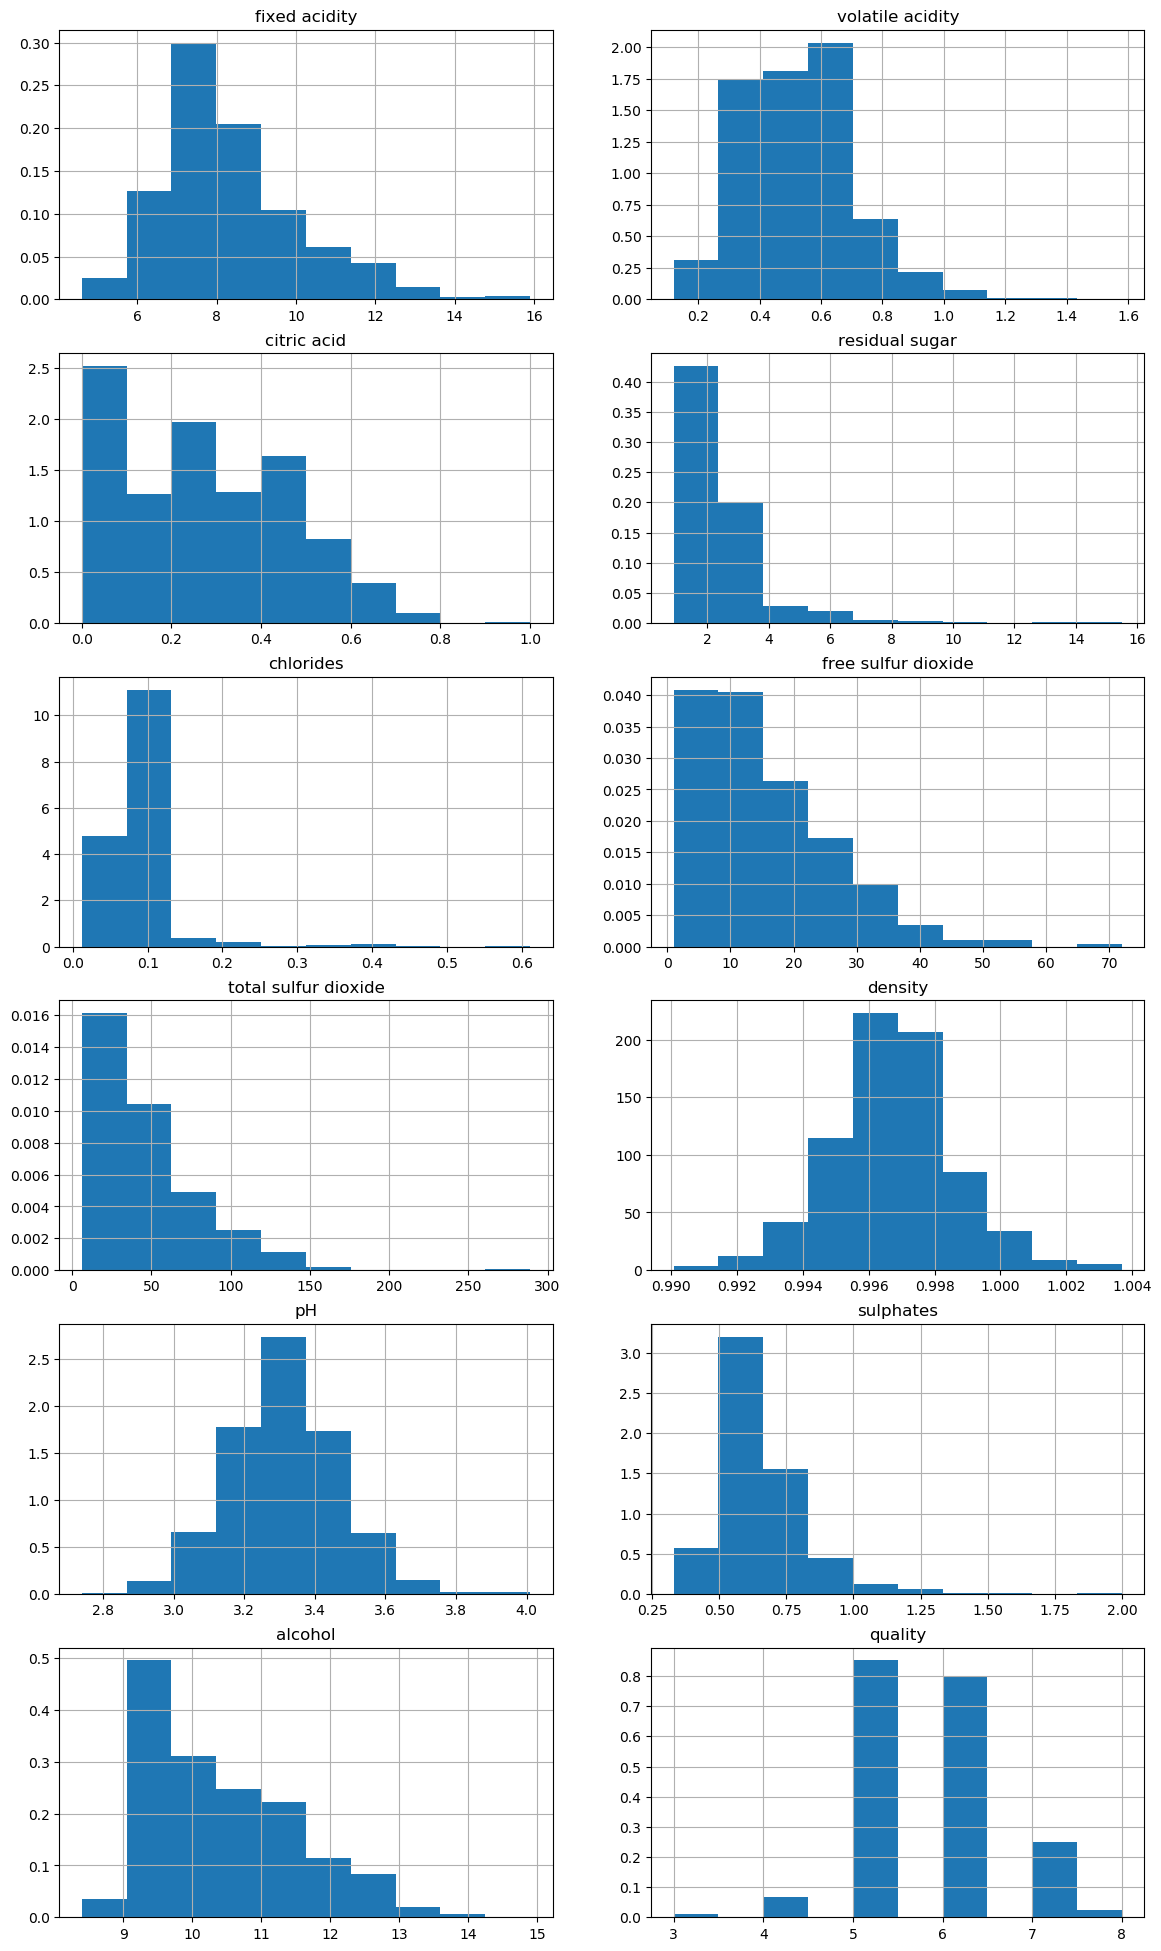

In [18]:
figura = plt.figure(dpi= 100,figsize=(14, 25))

graficaNo=1
for col in data.columns:
    plt.subplot(6,2,graficaNo)
    data.loc[:, col].hist(density = True)
    plt.title(col)
    X_range = data.loc[:, col].min(),data.loc[:, col].max()
    X_values =  np.linspace(*X_range)
    graficaNo=graficaNo+1
plt.show()

## Verificando la correlación entre las variables

In [19]:
matrizCorrelacion = data.corr()
matrizCorrelacion

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [20]:
matrizCorrelacion.style.background_gradient(cmap='coolwarm', axis=None)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1,-0.256131,0.671703,0.114777,0.0937052,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.0616683,0.124052
volatile acidity,-0.256131,1,-0.552496,0.00191788,0.0612978,-0.0105038,0.07647,0.0220262,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1,0.143577,0.203823,-0.0609781,0.035533,0.364947,-0.541904,0.31277,0.109903,0.226373
residual sugar,0.114777,0.00191788,0.143577,1,0.0556095,0.187049,0.203028,0.355283,-0.0856524,0.00552712,0.0420754,0.0137316
chlorides,0.0937052,0.0612978,0.203823,0.0556095,1,0.00556215,0.0474005,0.200632,-0.265026,0.37126,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.0105038,-0.0609781,0.187049,0.00556215,1,0.667666,-0.0219458,0.0703775,0.0516576,-0.0694084,-0.0506561
total sulfur dioxide,-0.113181,0.07647,0.035533,0.203028,0.0474005,0.667666,1,0.0712695,-0.0664946,0.0429468,-0.205654,-0.1851
density,0.668047,0.0220262,0.364947,0.355283,0.200632,-0.0219458,0.0712695,1,-0.341699,0.148506,-0.49618,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.0856524,-0.265026,0.0703775,-0.0664946,-0.341699,1,-0.196648,0.205633,-0.0577314
sulphates,0.183006,-0.260987,0.31277,0.00552712,0.37126,0.0516576,0.0429468,0.148506,-0.196648,1,0.0935948,0.251397


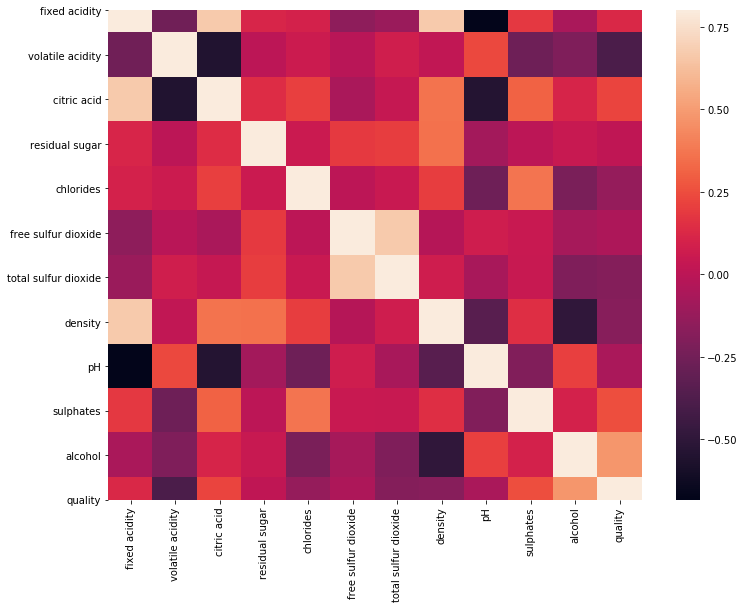

In [21]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(matrizCorrelacion, vmax=.8, square=True);

In [22]:
matrizCorrelacion[['quality']].sort_values(by = 'quality',ascending = False).style.background_gradient()

,quality
quality,1
alcohol,0.476166
sulphates,0.251397
citric acid,0.226373
fixed acidity,0.124052
residual sugar,0.0137316
free sulfur dioxide,-0.0506561
pH,-0.0577314
chlorides,-0.128907
density,-0.174919


## Seleccionando las 2 variables
Se eligen las siguiente variables independientes por tener una correlación mas alta con la variable dependiente(quality):
* alhocol
* volatile acidity

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


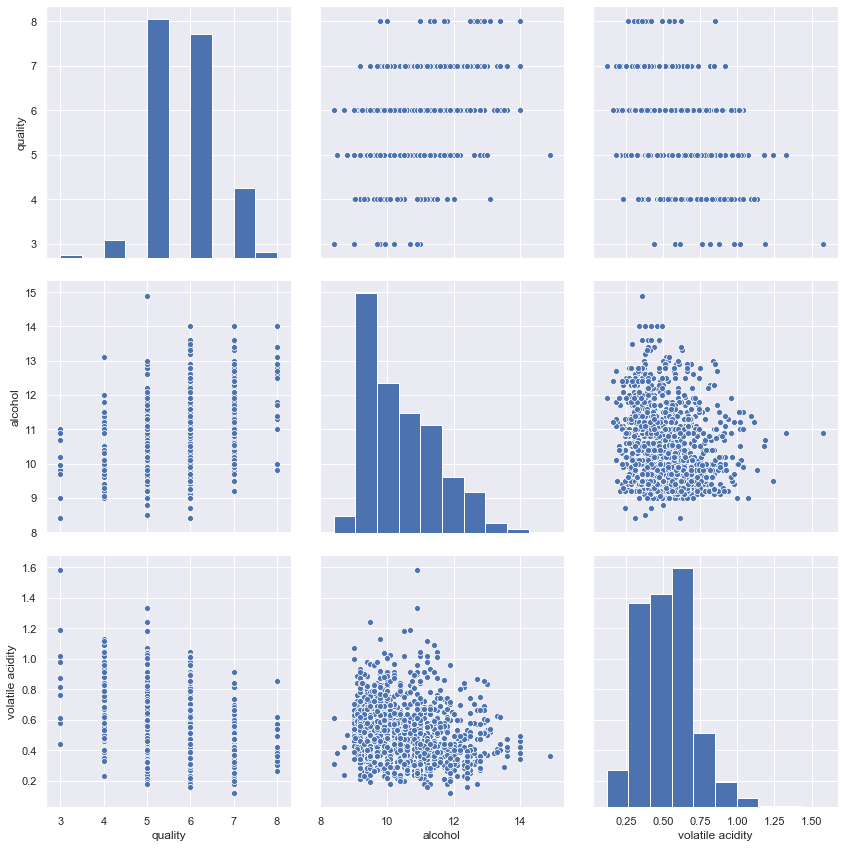

In [23]:
sns.set()
col=['quality','alcohol','volatile acidity']
sns.pairplot(data[col], size = 4)
plt.show()

# Construyendo modelo

**Función para estimar 'y' de forma vectorizada**

In [24]:
def calcular_yhat(param_modelo,matriz_entrenamiento):
    return tf.tensordot(matriz_entrenamiento,param_modelo,1)

**Función para calcular el error**

In [25]:
def calcular_error(y_real,y_calculada):
    return 1/2*tf.reduce_mean(tf.math.square(y_real - y_calculada))

**Función para definir y entrenar el modelo**

In [26]:
def entrenar_modelo_regresion_lineal(x_vector,y_vector,epochs,imprimir_error_cada,learning_rate,grado):
    
    tf.reset_default_graph()
    g = tf.Graph()
    with g.as_default():    
    
        lr = tf.placeholder(tf.float32,name="lr")
        
        
        parametros_modelo = tf.get_variable("parametros",dtype=tf.float32, shape=[cant_parametros,1],initializer=tf.zeros_initializer())
        x = tf.placeholder(tf.float32,x_v.shape,"x")
        y = tf.placeholder(tf.float32,y_v.shape,"y")
        #matriz_para_entrenar = np.column_stack((x,np.ones_like(x)))
        with tf.name_scope("vectorizando"):
#             matriz_para_entrenar = tf.stack((x,tf.ones_like(x)))
            matriz_para_entrenar = x
        with tf.name_scope("modelo"):
            yhat = calcular_yhat(parametros_modelo,matriz_para_entrenar)
        with tf.name_scope("costo"):    
            error = calcular_error(y, yhat)
            error_summary = tf.summary.scalar(name='error_summary', tensor=error)
        with tf.name_scope("gradiente"):
            #grad = tf.gradients(error,[m,b])
            grad = tf.gradients(error,parametros_modelo)
        with tf.name_scope("actualizado_parametros"):
            new_params = tf.assign(parametros_modelo, parametros_modelo - lr*grad[0] )
        
        
        # Inicializar variables
        init = tf.global_variables_initializer()
        # Iniciando grafo
        with tf.Session(graph = g) as session:
            # Inicializamos las variables en la sesión
            session.run(init) 
            # Manejo de los logs en tensorboard
            writer = tf.summary.FileWriter('./tensorBoardLogs/'+ datetime.today().strftime('%Y-%m-%d_%H-%M-%S')
                                           + '_GadientDescent_lr=' + str(learning_rate)
                                           + '_epochs=' + str(epochs)
                                           + '_polinomioGrado=' + str(grado), session.graph)
                  
            
            # batch gradient descent
            feed_dict = {x:x_vector, y:y_vector, lr:learning_rate}
#             plt.scatter(x_vector,y_vector)
            for i in range(epochs+1):
                if (i>0 and i%imprimir_error_cada==0):
                    print("Gradiente del error respecto de parametros - interación: ",i)
                    print(session.run(grad,feed_dict=feed_dict))
                summary_error = session.run(error_summary, feed_dict = feed_dict)
                writer.add_summary(summary_error, i)
                session.run(new_params,feed_dict=feed_dict)
                predicciones = session.run(yhat,feed_dict=feed_dict)
#                 plt.plot(x_vector,predicciones[-1,:],label=str(i))
            
            parametros_finales = session.run(parametros_modelo,feed_dict=feed_dict)
            print("Parametros finales: " , parametros_finales)
#             plt.show()
            writer.close()

# Feature Engineering

Se construyen 2 polinomios distintos para evaluar cual describe mejor la iteracción entre las 2 variable independientes elegidas:
* Polinomio de grado 2
* Polinomio de grado 3

In [27]:
#Polinomio grado 2
grado=2
poly = PolynomialFeatures(grado)
x_v = poly.fit_transform(data[['alcohol','volatile acidity']])
cant_parametros=x_v.shape[1]
y_v = data[['quality']]
#Cantidad de datos
print("x_v:",x_v.shape)
print("y_v:",y_v.shape)
print("cant_parametros:",cant_parametros)



x_v: (1599, 6)
y_v: (1599, 1)
cant_parametros: 6


**Entrenando modelo de poliomio grado 2**

In [28]:
# La primera columna representa el learning rate 
# y la segunda la cantidad de epochs (en este caso se usa un valor fijo de 100 
# para poder comparar de igual forma cada exerimento)
hiperparametros = [[0.00015,200],
                   [0.00010,200],
                   [0.00001,200],
                   [0.000001,200]]

for x in range(len(hiperparametros)):
    print("\n\nHiperparametros del modelo -> learning_rate: ", hiperparametros[x][0], "  epochs:", hiperparametros[x][1])
    entrenar_modelo_regresion_lineal(x_v,y_v,int(hiperparametros[x][1]),50,hiperparametros[x][0],grado)




Hiperparametros del modelo -> learning_rate:  0.00015   epochs: 200
Gradiente del error respecto de parametros - interación:  50
[array([[-0.20669761],
       [-1.3611676 ],
       [-0.09205852],
       [-5.298634  ],
       [-0.5538434 ],
       [-0.03756863]], dtype=float32)]
Gradiente del error respecto de parametros - interación:  100
[array([[-0.15807705],
       [-0.8539513 ],
       [-0.06568804],
       [ 0.04764697],
       [-0.28050375],
       [-0.02162254]], dtype=float32)]
Gradiente del error respecto de parametros - interación:  150
[array([[-0.15574642],
       [-0.8393227 ],
       [-0.06345419],
       [ 0.09176049],
       [-0.2619576 ],
       [-0.01977897]], dtype=float32)]
Gradiente del error respecto de parametros - interación:  200
[array([[-0.15385516],
       [-0.82914364],
       [-0.06149647],
       [ 0.09050852],
       [-0.24621503],
       [-0.01812334]], dtype=float32)]
Parametros finales:  [[0.00518484]
 [0.03020075]
 [0.00219943]
 [0.04647765]
 [0.01

In [29]:
#Polinomio grado 3
grado=3
poly = PolynomialFeatures(grado)
x_v = poly.fit_transform(data[['alcohol','volatile acidity']])
cant_parametros=x_v.shape[1]
y_v = data[['quality']]
#Cantidad de datos
print("x_v:",x_v.shape)
print("y_v:",y_v.shape)
print("cant_parametros:",cant_parametros)


x_v: (1599, 10)
y_v: (1599, 1)
cant_parametros: 10


**Entrenando modelo de poliomio grado 3**

In [30]:
# La primera columna representa el learning rate 
# y la segunda la cantidad de epochs (en este caso se usa un valor fijo de 100 
# para poder comparar de igual forma cada exerimento)

hiperparametros = [[0.000001,200],
                   [0.0000001,200],
                   [0.00000001,200],
                   [0.000000001,200]]

for x in range(len(hiperparametros)):
    print("\n\nHiperparametros del modelo -> learning_rate: ", hiperparametros[x][0], "  epochs:", hiperparametros[x][1])
    entrenar_modelo_regresion_lineal(x_v,y_v,int(hiperparametros[x][1]),50,hiperparametros[x][0],grado)



Hiperparametros del modelo -> learning_rate:  1e-06   epochs: 200
Gradiente del error respecto de parametros - interación:  50
[array([[ -0.42889908],
       [ -3.0947998 ],
       [ -0.22821337],
       [-16.834034  ],
       [ -1.6796228 ],
       [ -0.12517351],
       [  2.0114784 ],
       [ -9.77263   ],
       [ -0.9105227 ],
       [ -0.06711564]], dtype=float32)]
Gradiente del error respecto de parametros - interación:  100
[array([[ -0.42393497],
       [ -3.0589085 ],
       [ -0.22337094],
       [-16.63882   ],
       [ -1.6366501 ],
       [ -0.1211094 ],
       [  1.9763136 ],
       [ -9.406421  ],
       [ -0.872111  ],
       [ -0.06371114]], dtype=float32)]
Gradiente del error respecto de parametros - interación:  150
[array([[ -0.41907126],
       [ -3.0237427 ],
       [ -0.21865539],
       [-16.447556  ],
       [ -1.5948545 ],
       [ -0.11716171],
       [  1.9418697 ],
       [ -9.050966  ],
       [ -0.8348415 ],
       [ -0.06040955]], dtype=float32)]
Gra

### Uso de TensorBoard para visualizar grafo y monitorear error

<img src="TensorBoard.png">

<img src="GradientDescentTensorBoard.png">

### Conclusión: 
El modelo con polinomio de **grado 2** con learning rate de **0.0001** es el mejor ya que tiene un error bajo y es el que más rápido empieza a converger.
<br><br>
**Salida final del modelo con learning rate de 0.0001**
<br><br>


<img src="Salida_PolinomioGrado=2_LearningRate=0.0001.png">

